In [1]:
%cd ..

/Users/deyanmihaylov/Documents/Work/PrimordialBlackHoles


In [2]:
# Import necessary modules
from pbh import PrimordialBlackHole
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [3]:
# Define parameters
spacetime = "Kerr"
initial_mass = 5.
final_mass = 1.
initial_momentum = 0.
save_path = False

In [4]:
# Create PrimordialBlackHole object
pbh = PrimordialBlackHole(
    spacetime,
    initial_mass, final_mass,
    initial_momentum,
    save_path=save_path,
)

In [11]:
# Parameters of the study
N_total = 2000000000
N_per_batch = 100000000

N_batch = int(np.ceil(N_total / N_per_batch))
zfl = len(str(N_batch))

In [12]:
# Execute the model N_total times and save the data in batch files
i_total = 0
i_batch = 0

while i_total < N_total:
    batch_results = []
    for i in range(N_per_batch):
        pbh.evolve()
        batch_results.append(pbh.extremal)

    with h5py.File(f"data/count_batch_{i_batch:0{zfl}}.h5", 'w') as f:
        f.create_dataset(
            "data",
            data=np.array(batch_results),
            compression="gzip",
            compression_opts=9,
        )
    
    i_batch += 1
    i_total += N_per_batch

In [13]:
# Read the data from batch files and count the extremal cases
N_extremals = []
N_totals = []

extremal = 0
total = 0

for i in range(N_batch):
    with h5py.File(f"data/count_batch_{i:0{zfl}}.h5", 'r') as f:
        data = f["data"][:]

        extremal += np.where(data == 1)[0].size
        total += data.size

        N_extremals.append(extremal)
        N_totals.append(total)

N_extremals = np.array(N_extremals)
N_totals = np.array(N_totals)

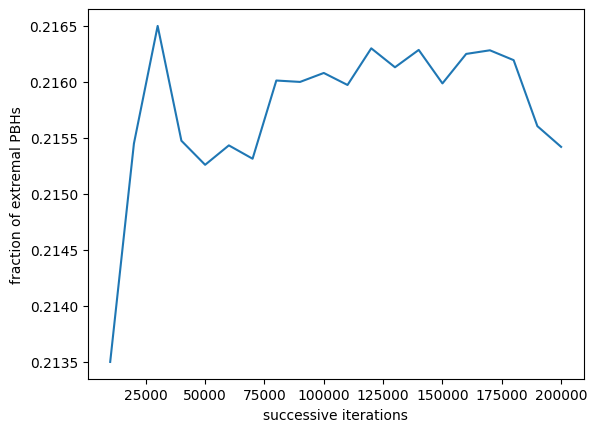

In [17]:
# Plot counts
plt.figure()

plt.plot(N_totals, N_extremals / N_totals)

plt.xlabel("successive iterations")
plt.ylabel("fraction of extremal PBHs")

plt.show()